In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
df = pd.read_csv(r'C:\Users\blake\Desktop\Food_price_indices_data_dec26.csv')

In [6]:
# Looking at data
df.head()

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,First Difference
0,1990-01,64.1,73.4,53.5,64.1,44.59,87.9,NaN
1,1990-02,64.5,76.0,52.2,62.2,44.50,90.7,0.4
2,1990-03,63.8,77.8,41.4,61.3,45.75,95.1,-0.7
3,1990-04,65.8,80.4,48.4,62.8,44.02,94.3,2.0
4,1990-05,64.4,81.0,39.2,62.0,45.50,90.4,-1.4


In [7]:
# Setting Date index
df.set_index('Date',inplace=True)
df.index = pd.to_datetime(df.index)

In [8]:
df.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01'],
              dtype='datetime64[ns]', name='Date', length=383, freq=None)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Food Price Index,383.0,83.779634,24.300403,50.50,63.600,78.00,98.750,137.60
Meat,383.0,83.070757,16.159355,51.10,70.500,81.60,96.100,119.20
Dairy,383.0,82.450392,31.849821,36.80,54.750,75.40,107.200,156.50
Cereals,383.0,84.844648,29.592929,48.60,59.950,80.20,100.700,163.30
Oils,383.0,86.007911,34.002618,35.83,61.635,79.95,103.255,184.84
Sugar,383.0,80.140470,31.080773,31.80,57.550,74.70,95.400,183.20
First Difference,382.0,0.184031,2.265809,-15.20,-0.875,0.10,1.100,8.00


<AxesSubplot:xlabel='Date'>

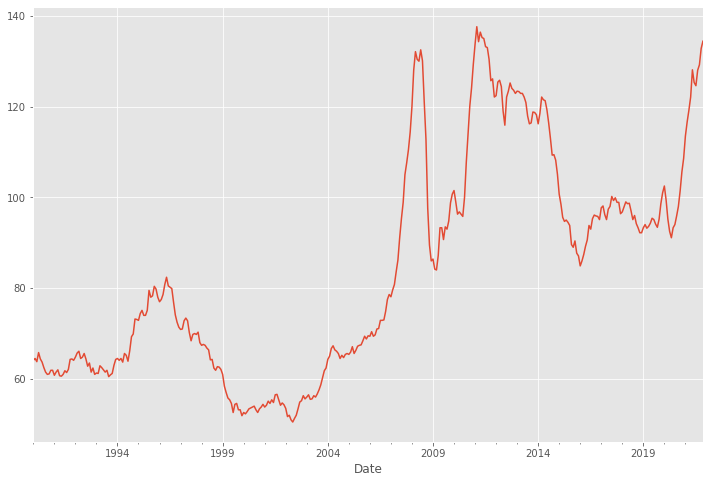

In [10]:
# Plotting Food Price Index
df['Food Price Index'].plot()

In [11]:
time_series = df['Food Price Index']
type(time_series)

pandas.core.series.Series

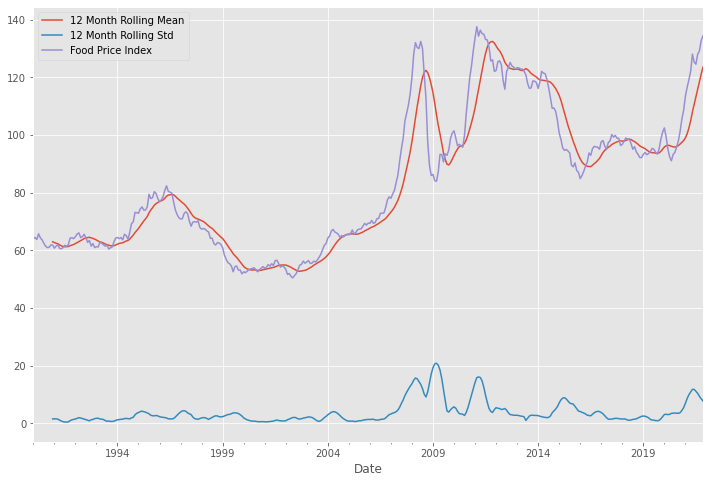

In [12]:
#Plotting 12 Month Rolling Mean and Std of Food Price Index
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

In [13]:
# This section we decompose our index
from statsmodels.tsa.seasonal import seasonal_decompose

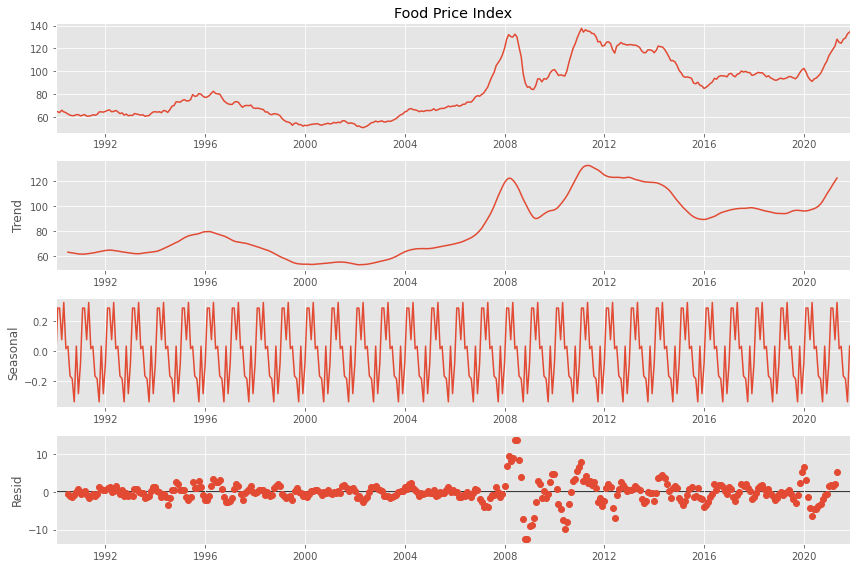

In [14]:
# Here we decompose the index
decomp = seasonal_decompose(time_series)
fig = decomp.plot()

In [15]:
# This section we explore Dicky-Fuller Test
from statsmodels.tsa.stattools import adfuller

In [16]:
result = adfuller(df['Food Price Index'])
result

(-1.2934323896862245,
 0.6321716212798392,
 2,
 380,
 {'1%': -3.4476763783532585,
  '5%': -2.869176103659426,
  '10%': -2.570837873961219},
 1516.0675316489292)

In [36]:
# We create a funtion that formats the result to a more visual manner
def adf_check(time_series):
    
    result = adfuller(time_series)
    print('Augmented Dicky-Fuller Test')
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Observations used']
    
    for value,label in zip(result,labels):
        print(label+ ':'+str(value))
        
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis')
        print('Reject null hypothesis')
        print('Data has no unit root and is stationary')
        
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')
        
        
adf_check(df['Food Price Index'])

Augmented Dicky-Fuller Test
ADF Test Statistic:-1.2934323896862245
p-value:0.6321716212798392
# of lags:2
Num of Observations used:380
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


Augmented Dicky-Fuller Test
ADF Test Statistic:-8.481578613523546
p-value:1.3885282589603358e-13
# of lags:1
Num of Observations used:380
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


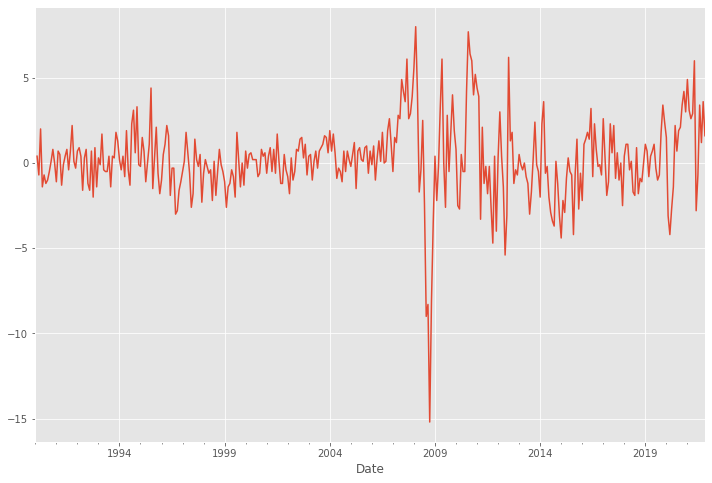

In [38]:
# We would difference it once as follows if it is non-stationary
df['First Difference'] = df['Food Price Index'] - df['Food Price Index'].shift(1)
df['First Difference'].plot()
adf_check(df['First Difference'].dropna())


Augmented Dicky-Fuller Test
ADF Test Statistic:-4.469295006386123
p-value:0.00022334651902352403
# of lags:14
Num of Observations used:356
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


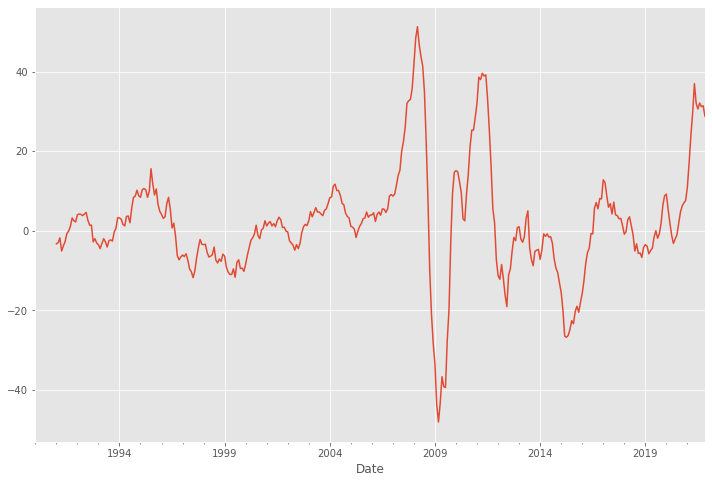

In [48]:
# We can even difference by a entire season as follows
df['Seasonal Difference'] = df['Food Price Index'] - df['Food Price Index'].shift(12)
df['Seasonal Difference'].plot()
adf_check(df['Seasonal Difference'].dropna())

In [40]:
# This section we explore Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

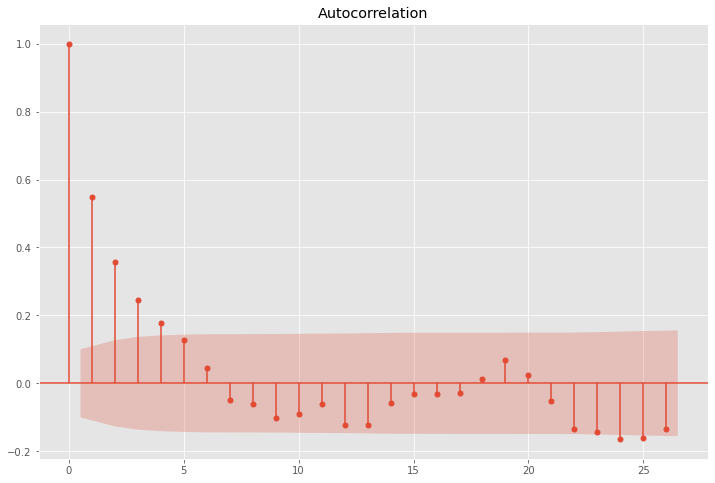

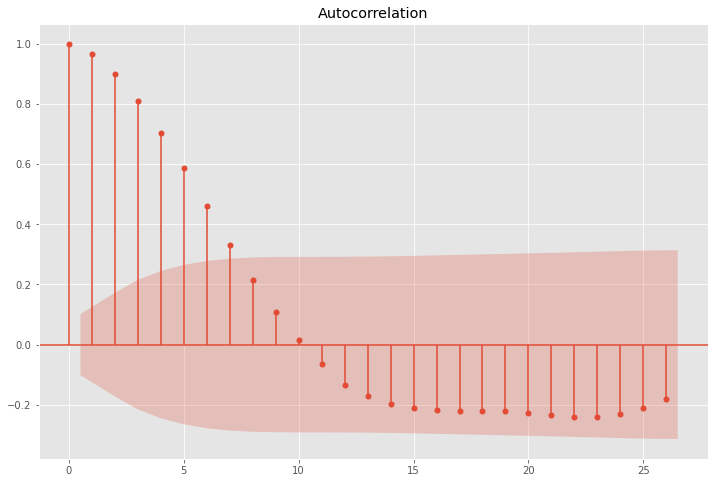

In [49]:
# Autocorrelation
fig_first = plot_acf(df['First Difference'].dropna())
fig_seasonal_first = plot_acf(df['Seasonal Difference'].dropna())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

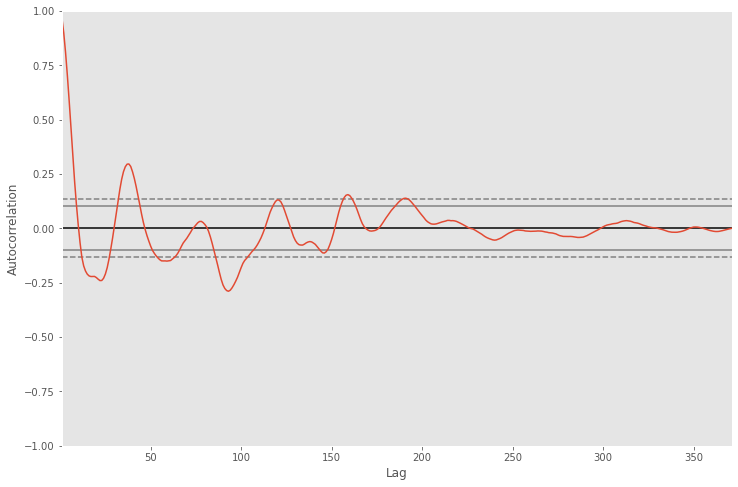

In [50]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal Difference'].dropna())

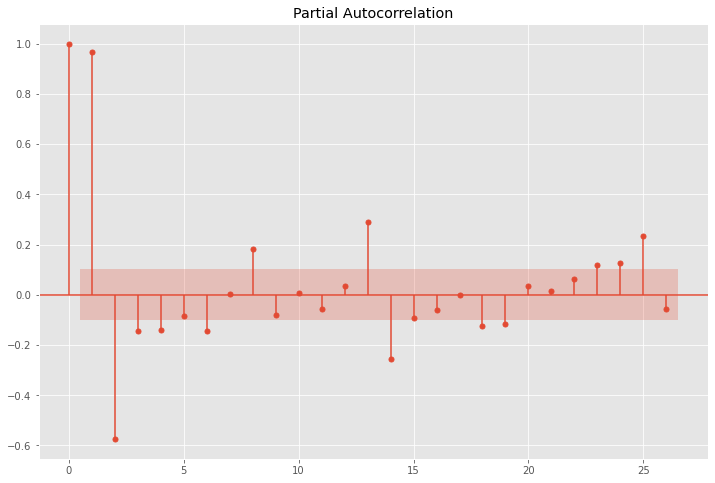

In [51]:
# Partical autocorrelation
results = plot_pacf(df['Seasonal Difference'].dropna())

In [46]:
# This section we explore ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [75]:
#help(ARIMA)

In [53]:
model = sm.tsa.statespace.SARIMAX(df['Food Price Index'],order=(0,1,0),seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\blake\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\blake\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                     Food Price Index   No. Observations:                  383
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -849.970
Date:                              Sun, 26 Dec 2021   AIC                           1705.941
Time:                                      02:01:12   BIC                           1717.681
Sample:                                  01-01-1990   HQIC                          1710.604
                                       - 11-01-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1088      0.051     -2.144      0.032      -0.208      -0.009
ma.S.L12      -0.99

<AxesSubplot:xlabel='Date'>

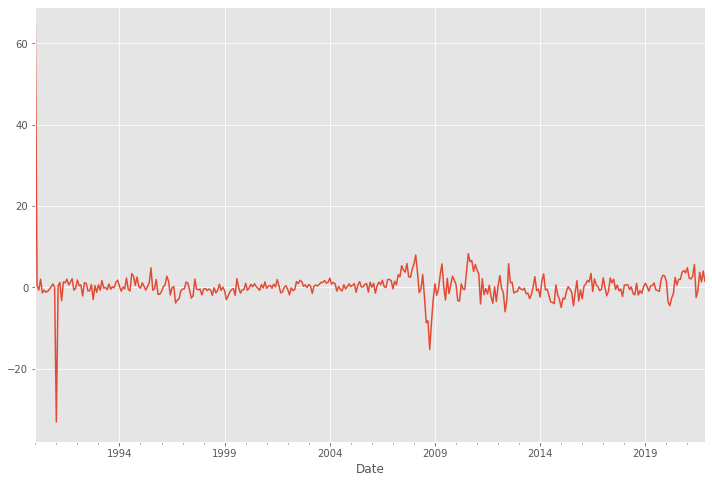

In [55]:
# Plotting the residuals
results.resid.plot()
# Some errors at early values but relatively accurate further down the time series

<AxesSubplot:ylabel='Density'>

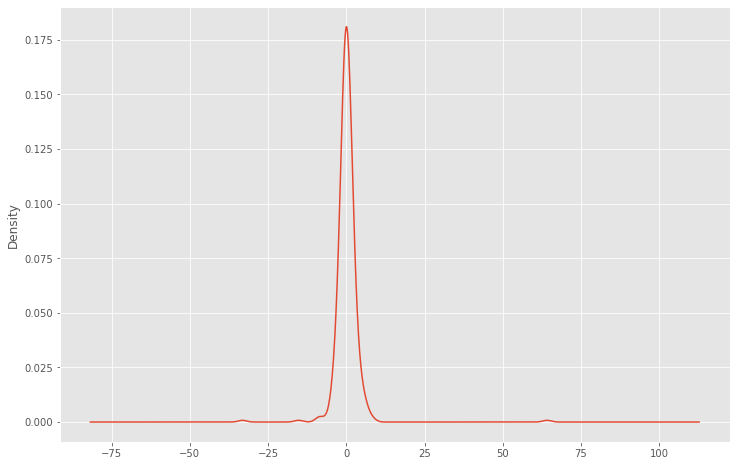

In [56]:
# Plotting Kernal density estimation
results.resid.plot(kind='kde')
# Residuals is normally distributed and centered around 0

<AxesSubplot:xlabel='Date'>

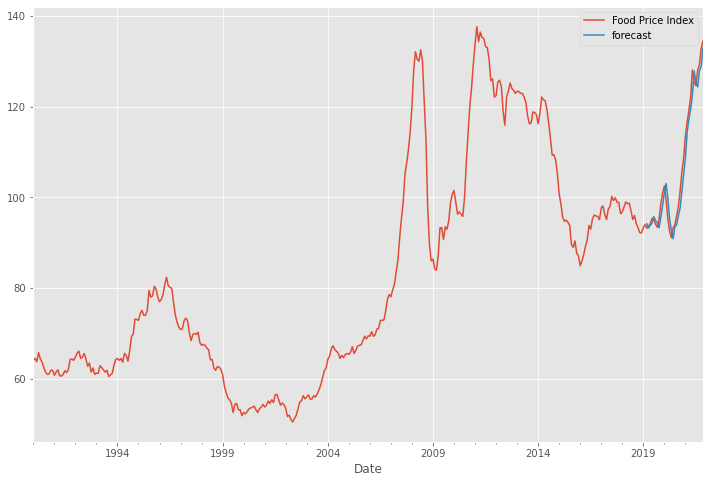

In [57]:
# Predicting values
df['forecast'] = results.predict(start=350,end=383)
df[['Food Price Index','forecast']].plot()

In [60]:
# Creating future dates for forecasting
from pandas.tseries.offsets import DateOffset

In [61]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [62]:
future_dates

[Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'),
 Timestamp('2023-04-01 00:00:00'),
 Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-06-01 00:00:00'),
 Timestamp('2023-07-01 00:00:00'),
 Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-09-01 00:00:00'),
 Timestamp('2023-10-01 00:00:00')]

In [74]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)
#future_df

In [68]:
final_df = pd.concat([df,future_df])
final_df['forecast'] = results.predict(start=383,end=407)

<AxesSubplot:>

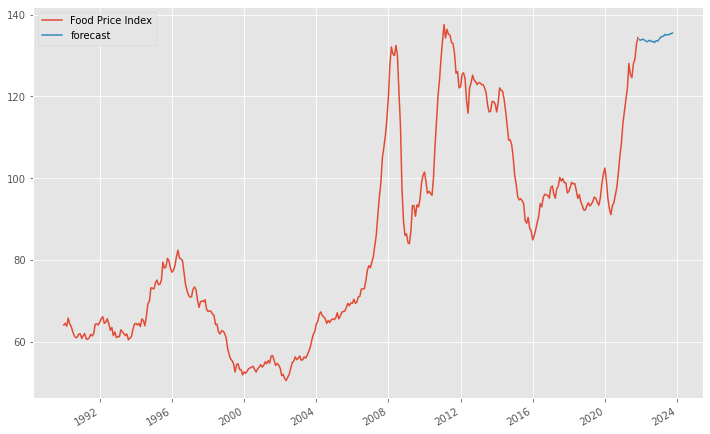

In [73]:
# Forecasting the future food price index
final_df[['Food Price Index','forecast']].plot()

In [ ]:
# Based on the forecast, prices is estimated to have a slight increase in the future